In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# Read the Mouse and Drug Data and the Clinical Trial Data
drug_data = pd.read_csv("./data/mouse_drug_data.csv")
drug_data.head()


,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [2]:
# Read Clinical Trial Data
clinical_trial_data = pd.read_csv("./data/clinicaltrial_data.csv")
clinical_trial_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
# Combine the data into a single dataset
merge_data_df = pd.merge(clinical_trial_data, drug_data, how='inner', on='Mouse ID').drop_duplicates()

# Display the data table for preview
merge_data_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [4]:
# Calculate mean tumor volume
subset_df = merge_data_df.loc[:,["Drug", "Timepoint", "Tumor Volume (mm3)"]]
subset_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,45.651331
2,Capomulin,10,43.270852
3,Capomulin,15,43.784893
4,Capomulin,20,42.731552


In [35]:
mean_tumor_vol = subset_df.groupby(["Drug", "Timepoint"]).mean()
mean_tumor_vol.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [6]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Convert to DataFrame
# Preview DataFrame

stderror_tumor_vol = subset_df.groupby(["Drug", "Timepoint"]).sem()
stderror_tumor_vol.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [33]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked

pivot_table = mean_tumor_vol.reset_index().pivot(index="Timepoint", columns="Drug", 
                                                values="Tumor Volume (mm3)")

pivot_table


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


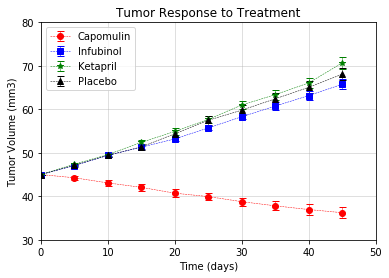

In [8]:
# Generate the Plot (with Error Bars) to show how volume changes over time for each drug treatment
# Save the Figure

ax = plt.subplot(111)

x_axis = np.arange(0,50,5)

# plot title and axes titles
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")


# Plot x-axis vs mean tumor volume values with error

ax.errorbar(x_axis, mean_tumor_vol.loc["Capomulin", "Tumor Volume (mm3)"], yerr = stderror_tumor_vol.loc["Capomulin", "Tumor Volume (mm3)"],
            fmt="o", color="Red", linestyle="--", label="Capomulin", linewidth=0.5, capsize=3.5)
ax.errorbar(x_axis, mean_tumor_vol.loc["Infubinol", "Tumor Volume (mm3)"], yerr = stderror_tumor_vol.loc["Infubinol", "Tumor Volume (mm3)"],
            fmt="s", color="Blue", linestyle="--", label="Infubinol", linewidth=0.5, capsize=3.5)
ax.errorbar(x_axis, mean_tumor_vol.loc["Ketapril", "Tumor Volume (mm3)"], yerr = stderror_tumor_vol.loc["Ketapril", "Tumor Volume (mm3)"],
            fmt="*", color="Green", linestyle="--", label="Ketapril", linewidth=0.5, capsize=3.5)
ax.errorbar(x_axis, mean_tumor_vol.loc["Placebo", "Tumor Volume (mm3)"], yerr = stderror_tumor_vol.loc["Placebo", "Tumor Volume (mm3)"],
            fmt="^", color="Black", linestyle="--", label="Placebo", linewidth=0.5, capsize=3.5)

# Add legends
plt.legend(loc="best")

# Add gridlines
plt.grid(alpha = 0.5)

# Set X and Y limits
plt.xlim(0,50)
plt.ylim(30,80)

# Plotting graph
plt.show()


In [9]:
### x axis increments of 5!

## Metastatic Response to Treatment

In [10]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame

subset2_df = merge_data_df.loc[:,["Drug", "Timepoint", "Metastatic Sites"]]
subset2_df.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0
1,Capomulin,5,0
2,Capomulin,10,0
3,Capomulin,15,0
4,Capomulin,20,0


In [11]:
# Calculate mean Metastatic site grouped by drug and timepoint

metasite_mean = subset2_df.groupby(["Drug", "Timepoint"]).mean()
metasite_mean.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [40]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame

metasite_stderror = subset2_df.groupby(["Drug", "Timepoint"]).sem().reset_index()
metasite_stderror.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [14]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked

pivot_table = mean_tumor_vol.reset_index().pivot(index="Timepoint", columns="Drug", 
                                                values="Tumor Volume (mm3)")

pivot_table.head()



Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


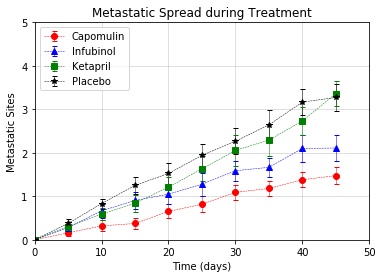

In [15]:
# Generate the Plot (with Error Bars)
# Save the Figure
# Show the Figure

ax = plt.subplot(111)

x_axis = np.arange(0,50,5)

# plot title and axes titles
plt.title("Metastatic Spread during Treatment")
plt.xlabel("Time (days)")
plt.ylabel("Metastatic Sites")


# Plot x-axis vs mean tumor volume values with error

ax.errorbar(x_axis, metasite_mean.loc["Capomulin", "Metastatic Sites"], yerr = metasite_stderror.loc["Capomulin", "Metastatic Sites"],
            fmt="o", color="Red", linestyle="--", label="Capomulin", linewidth=0.5, capsize=2.5)
ax.errorbar(x_axis, metasite_mean.loc["Infubinol", "Metastatic Sites"], yerr = metasite_stderror.loc["Infubinol", "Metastatic Sites"],
            fmt="^", color="Blue", linestyle="--", label="Infubinol", linewidth=0.5, capsize=2.5)
ax.errorbar(x_axis, metasite_mean.loc["Ketapril", "Metastatic Sites"], yerr = metasite_stderror.loc["Ketapril", "Metastatic Sites"],
            fmt="s", color="Green", linestyle="--", label="Ketapril", linewidth=0.5, capsize=2.5)
ax.errorbar(x_axis, metasite_mean.loc["Placebo", "Metastatic Sites"], yerr = metasite_stderror.loc["Placebo", "Metastatic Sites"],
            fmt="*", color="Black", linestyle="--", label="Placebo", linewidth=0.5, capsize=2.5)

# Add legends
plt.legend(loc="best")

# Add gridlines
plt.grid(alpha = 0.5)

# Set X and Y limits
plt.xlim(0,50)
plt.ylim(0,5)

# Plotting graph
plt.show()


## Survival Rates

In [39]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
# Convert to DataFrame
# Preview DataFrame

group_df = merge_data_df.groupby(["Drug", "Timepoint"])
mice_count = group_df[["Mouse ID"]].count().rename(columns={"Mouse ID": "Mouse Count"}).reset_index()
mice_count.head()


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [18]:
# Minor Data Munging to Re-Format the Data Frames
# Preview the Data Frame

mice_pivot = mice_count.reset_index().pivot(index="Timepoint", columns="Drug", values="Mouse Count")
mice_pivot.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


Drug       Timepoint
Capomulin  0            25
           5            25
           10           25
           15           24
           20           23
           25           22
           30           22
           35           22
           40           21
           45           21
Name: Mouse Count, dtype: int64

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


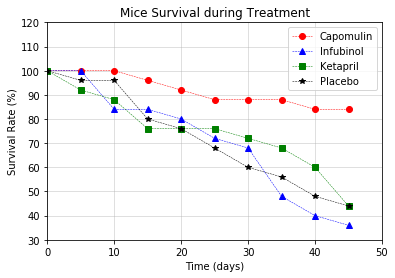

In [19]:
# Generate the Plot (Accounting for percentages)
# Save the Figure
# Show the Figure

x_axis = np.arange(0,50,5)

# plot title and axes titles
plt.title("Mice Survival during Treatment")
plt.xlabel("Time (days)")
plt.ylabel("Survival Rate (%)")


# Plot x-axis vs mean tumor volume values with error

plt.plot(x_axis, 100*mice_count.loc["Capomulin", "Mouse Count"]/25,
            marker="o", color="Red", linestyle="--", linewidth=0.5, label="Capomulin")
plt.plot(x_axis, 100*mice_count.loc["Infubinol", "Mouse Count"]/25,
            marker="^", color="Blue", linestyle="--", linewidth=0.5, label="Infubinol")
plt.plot(x_axis, 100*mice_count.loc["Ketapril", "Mouse Count"]/25, 
            marker="s", color="Green", linestyle="--", linewidth=0.5, label="Ketapril")
plt.plot(x_axis, 100*mice_count.loc["Placebo", "Mouse Count"]/25,
            marker="*", color="Black", linestyle="--", linewidth=0.5, label="Placebo")

# Add legends
plt.legend(loc="best")

# Add gridlines
plt.grid(alpha = 0.5)

# Set X and Y limits
plt.xlim(0,50)
plt.ylim(30,120)

# Plotting graph
plt.show()


In [32]:
merge_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Summary Bar Graph

In [90]:
# Calculate the percent changes for each drug
# Display the data to confirm

## Computing initial volume
#initial_volumes = merge_data_df.loc[(merge_data_df["Timepoint"] == 0), ["Drug", "Tumor Volume (mm3)"]]
#init_vol = initial_volumes.groupby("Drug")["Tumor Volume (mm3)"].sum()

# Initializing a tracking data frame and loop through each mouse's data to find their final tumor volume and record it.
#end_vol = pd.DataFrame(columns = ['Drug', 'Tumor Volume (mm3)'])

#for mouse in drug_data["Mouse ID"]:
 #   max_time = merge_data_df.loc[merge_data_df["Mouse ID"] == mouse, "Timepoint"].max()
 #   vol_final = merge_data_df.loc[(merge_data_df["Timepoint"] == max_time) & (merge_data_df["Mouse ID"] == mouse),
                                ["Drug", "Tumor Volume (mm3)"]]    
 #   end_vol = pd.concat([end_vol, vol_final])

# Group the final volumes by drug so we can compare it to the initial volume
#end_grouped = end_vol.groupby("Drug")["Tumor Volume (mm3)"].sum()

# Subtract the initial volume from the final volume and divide by the initial volume to get the % difference
#vol_change = 100*(end_grouped - init_vol)/init_vol

#print(vol_change)



Drug
Capomulin   -18.516516
Ceftamin     28.342171
Infubinol    30.442222
Ketapril     39.569314
Naftisol     36.012793
Placebo      34.463143
Propriva     31.643997
Ramicane    -19.574688
Stelasyn     41.260686
Zoniferol    31.513906
Name: Tumor Volume (mm3), dtype: float64


In [37]:
tumor_pct_change =  100 * (pivot_table.iloc[-1] - pivot_table.iloc[0]) / pivot_table.iloc[0]
tumor_pct_change


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [38]:
#tumor_pct_change_stderror = 100 * (pivot_table.iloc[-1] - pivot_table.iloc[0]) / pivot_table.iloc[0]
#tumor_pct_change_stderror

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple
# Splice the data between passing and failing drugs
# Orient widths. Add labels, tick marks, etc. 
# Use functions to label the percentages of changes
# Call functions to implement the function calls






# Save the Figure
# Show the Figure
fig.show()

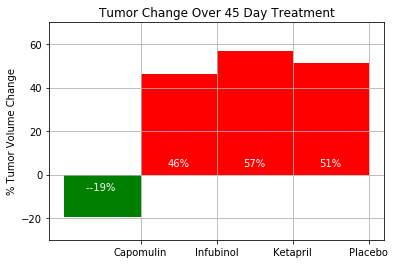